In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

In [3]:
dados = yf.download('JNJ', start="2020-01-01", end="2023-12-31", progress=False)
dados = dados.reset_index()
dados.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099075,5777000
1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592865,5752400
2,2020-01-06,144.000000,144.199997,142.850006,144.100006,128.432480,7731300
3,2020-01-07,144.009995,145.449997,141.380005,144.979996,129.216736,7382900
4,2020-01-08,144.869995,145.979996,143.699997,144.960007,129.198944,6605800


In [4]:
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [6]:
dados_prophet_treino = dados_treino.rename(columns={"Date": "ds", "Close": "y"})
dados_prophet_treino.head(5)

,ds,Open,High,Low,y,Adj Close,Volume
0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099075,5777000
1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592865,5752400
2,2020-01-06,144.000000,144.199997,142.850006,144.100006,128.432480,7731300
3,2020-01-07,144.009995,145.449997,141.380005,144.979996,129.216736,7382900
4,2020-01-08,144.869995,145.979996,143.699997,144.960007,129.198944,6605800


In [7]:
modelo = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=False)

modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp16fu9g5g/shjnscl4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp16fu9g5g/ete2s09l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74874', 'data', 'file=/tmp/tmp16fu9g5g/shjnscl4.json', 'init=/tmp/tmp16fu9g5g/ete2s09l.json', 'output', 'file=/tmp/tmp16fu9g5g/prophet_modeluca2hf8t/prophet_model-20240329124505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:45:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:45:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [8]:
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

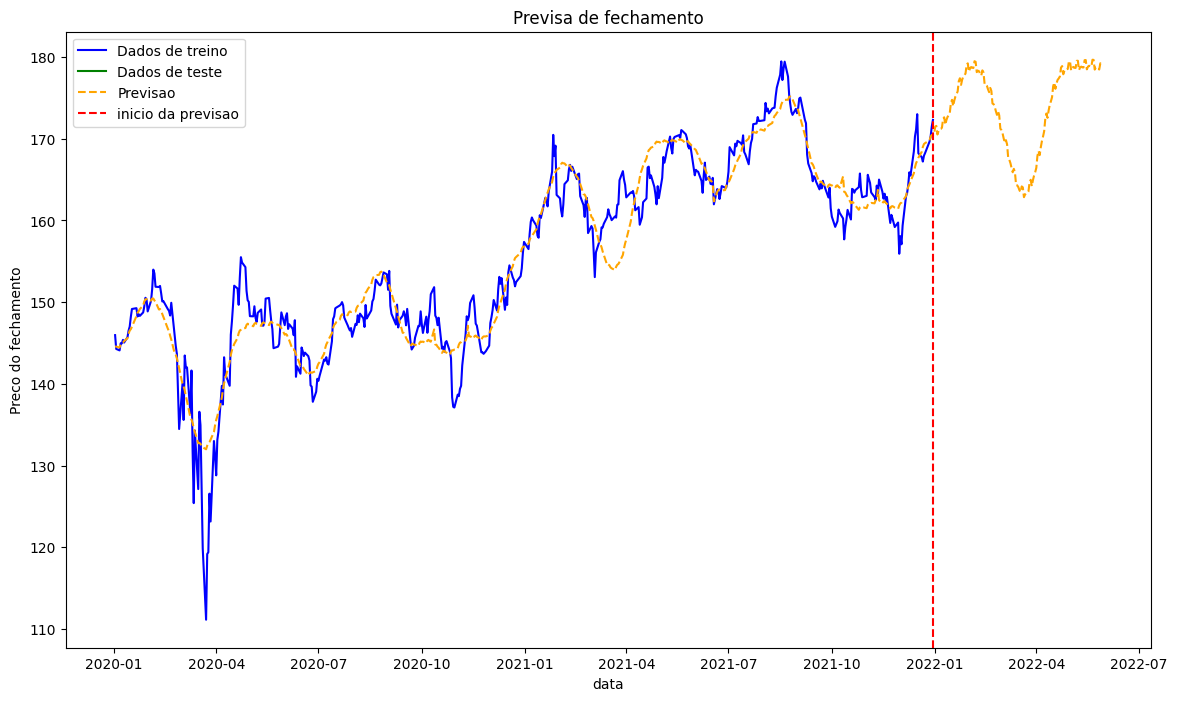

In [16]:
plt.figure(figsize=(14,8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label="Dados de treino", color="blue")
plt.plot(dados_teste['Date'], dados_teste['Close'], label="Dados de teste", color="green")

plt.plot(previsao['ds'], previsao['yhat'], label="Previsao", linestyle="--", color="orange")

plt.axvline(dados_treino['Date'].max(), color="red", linestyle="--", label="inicio da previsao")
plt.xlabel('data')
plt.ylabel("Preco do fechamento")
plt.title("Previsa de fechamento")
plt.legend()
plt.show()